In [1]:
"""Inspect result of ray_pipeline for the cryo_exp dataset"""

'Inspect result of ray_pipeline for the cryo_exp dataset'

In [2]:
import csv
import functools
import importlib
import os

import matplotlib
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import torch
import ray
import sys

from ray.tune.analysis import Analysis

# On slacgpu:
#sys.path.append('/afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/code/vaetree')
print(sys.path)

import analyze
import datasets
import nn
import vis
analyze.reload_libs()

['/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ray/pyarrow_files', '', '/opt/rh/devtoolset-6/root/usr/lib64/python2.7/site-packages', '/opt/rh/devtoolset-6/root/usr/lib/python2.7/site-packages', '/opt/rh/rh-python36/root/usr/lib64/python36.zip', '/opt/rh/rh-python36/root/usr/lib64/python3.6', '/opt/rh/rh-python36/root/usr/lib64/python3.6/lib-dynload', '/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages', '/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages', '/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/IPython/extensions', '/home/nmiolane/.ipython', '/afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/code/vaetree']


Using numpy backend


In [3]:
CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if CUDA else "cpu")

# MAIN_DIR = '/results/output_cryo_exp'
MAIN_DIR = '/afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d'
CMAP = 'gray'

analysis = Analysis(MAIN_DIR)

best_logdir = analysis.get_best_logdir(metric="average_loss", mode='min')
print("Best logdir is", best_logdir)

#OUTPUT = '/gpfs/slac/cryo/fs1/u/nmiolane/results/output_cryo_exp_class_2d/Train_5_dataset_name=cryo_exp_class_2d,lambda_adversarial=1.5834,lambda_regularization=0.060532,latent_dim=4,lr=0.00017883,n_block_2019-11-05_02-10-521jzzvchg'

OUTPUT = analyze.get_best_logdir(
    main_dir=MAIN_DIR, 
   select_dict={'class_2d': 30})

Best logdir is /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_10_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.24161,lambda_regu=1.1008,latent_dim=4,lr=0.00039388,n_blocks=5_2019-11-05_22-47-46c55wtw58
Comparing logdirs with parameters:
{'class_2d': 30}
Best logdir with required parameters is /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_11_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.0019873,lambda_regu=0.96069,latent_dim=3,lr=0.0001286,n_blocks=6_2019-11-05_22-49-088if114w0


In [4]:
# DATA_DIR = '/data/cryo'
DATA_DIR = '/afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/data/cryo'

DATASET_NAME = 'cryo_exp_class_2d'
IMG_SHAPE = (128, 128)
CLASS_2D = 30

SHAPE_STR = datasets.get_shape_string(IMG_SHAPE)
DATASET_PATH = os.path.join(
    DATA_DIR, 
    'train_val_datasets/%s_%d_%s.npy' % (
        DATASET_NAME, CLASS_2D, SHAPE_STR))
DATASET = np.load(DATASET_PATH)

LABELS_PATH = os.path.join(
    DATA_DIR, 
    'train_val_datasets/%s_%d_%s_labels.csv' % (
        DATASET_NAME, CLASS_2D, SHAPE_STR))

# Show original data

In [38]:
nn.conv_output_size(
    in_shape=(512, 8, 8), 
    out_channels=1024, 
    kernel_size=nn.ENC_KS, 
    stride=nn.ENC_STR, 
    padding=nn.ENC_PAD, 
    dilation=nn.ENC_DIL)

(1024, 4, 4)

Loading /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/data/cryo/train_val_datasets/cryo_exp_class_2d_30_128x128.npy
Dataset shape: (4917, 1, 128, 128)


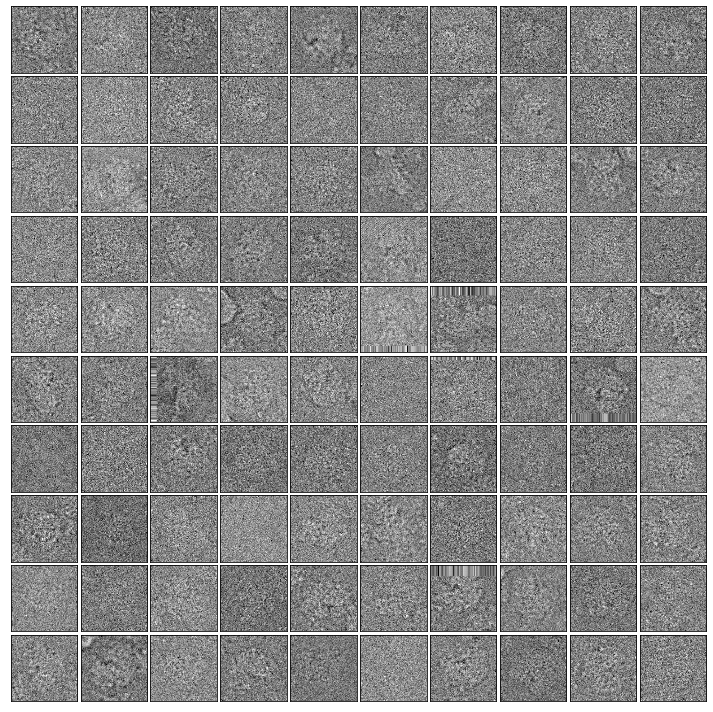

In [33]:
vis.show_data(DATASET_PATH, nrows=10, ncols=10, figsize=(10, 10))
plt.subplots_adjust(hspace=0.051, wspace=0.05)

Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_11_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.0019873,lambda_regu=0.96069,latent_dim=3,lr=0.0001286,n_blocks=6_2019-11-05_22-49-088if114w0/checkpoint_100/epoch_100_checkpoint.pth.
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_11_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.0019873,lambda_regu=0.96069,latent_dim=3,lr=0.0001286,n_blocks=6_2019-11-05_22-49-088if114w0/checkpoint_100/epoch_100_checkpoint.pth.
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_11_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.0019873,lambda_regu=0.96069,latent_dim=3,lr=0.0001286,n_blocks=6_2019-11-05_22-49-088if114w0/checkpoint_100/epoch_100_checkpoint.pth.
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/

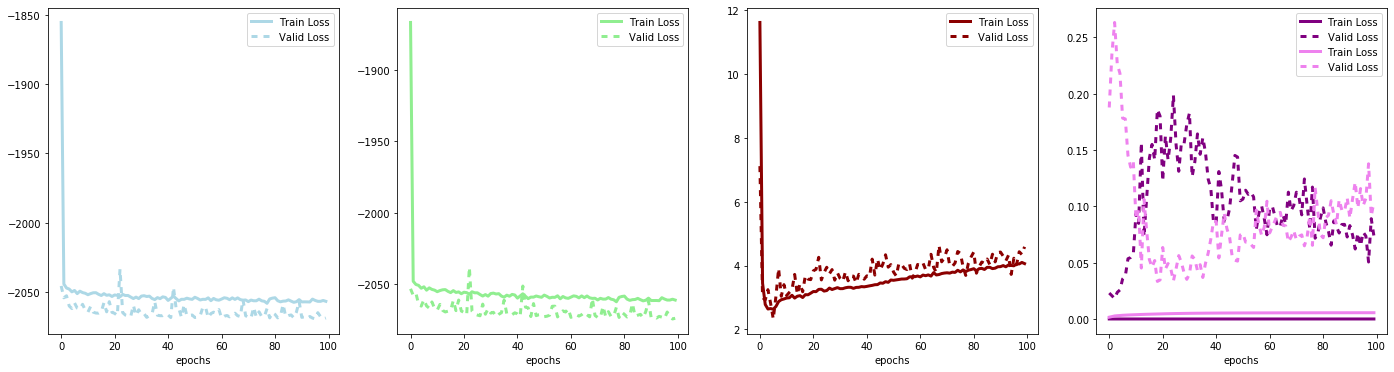

In [5]:
vis.plot_losses(OUTPUT)

Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_11_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.0019873,lambda_regu=0.96069,latent_dim=3,lr=0.0001286,n_blocks=6_2019-11-05_22-49-088if114w0/checkpoint_100/epoch_100_checkpoint.pth.
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_11_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.0019873,lambda_regu=0.96069,latent_dim=3,lr=0.0001286,n_blocks=6_2019-11-05_22-49-088if114w0/checkpoint_100/epoch_100_checkpoint.pth.
Loading encoder from network of architecture: conv_orig...


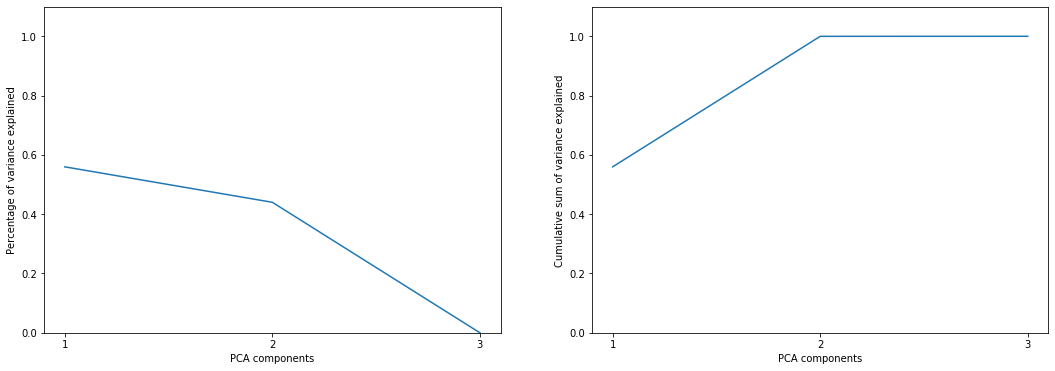

In [6]:
ax = vis.plot_variance_explained(OUTPUT, DATASET_PATH)

In [7]:
_, labels = analyze.get_cryo(OUTPUT, DATASET_PATH, LABELS_PATH)

Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_11_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.0019873,lambda_regu=0.96069,latent_dim=3,lr=0.0001286,n_blocks=6_2019-11-05_22-49-088if114w0/checkpoint_100/epoch_100_checkpoint.pth.
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_11_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.0019873,lambda_regu=0.96069,latent_dim=3,lr=0.0001286,n_blocks=6_2019-11-05_22-49-088if114w0/checkpoint_100/epoch_100_checkpoint.pth.
Loading encoder from network of architecture: conv_orig...
(4917, 3)


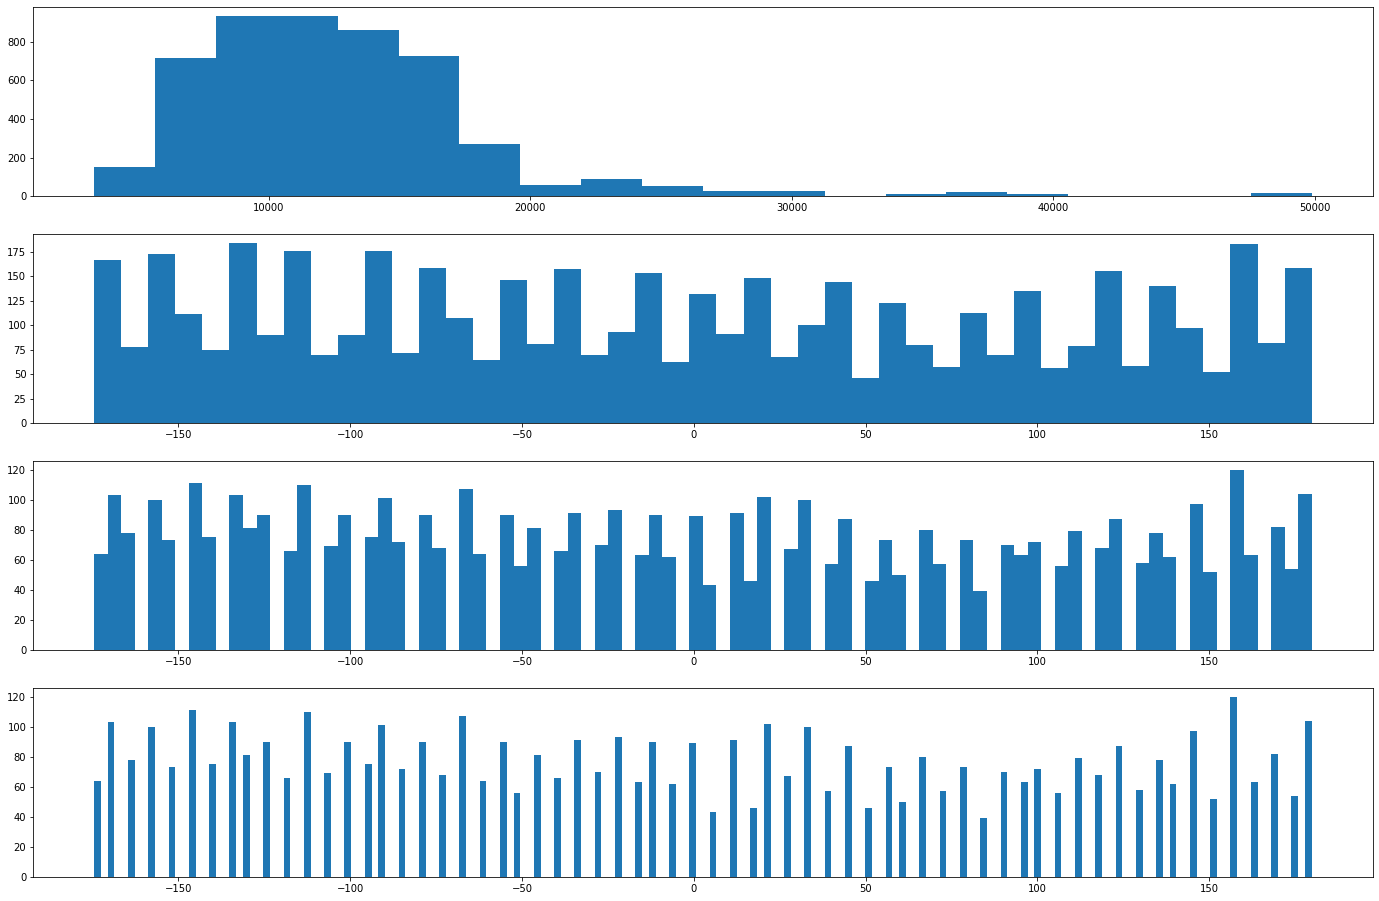

In [9]:
vis.hist_labels(labels)

Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_11_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.0019873,lambda_regu=0.96069,latent_dim=3,lr=0.0001286,n_blocks=6_2019-11-05_22-49-088if114w0/checkpoint_100/epoch_100_checkpoint.pth.
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_11_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.0019873,lambda_regu=0.96069,latent_dim=3,lr=0.0001286,n_blocks=6_2019-11-05_22-49-088if114w0/checkpoint_100/epoch_100_checkpoint.pth.
Loading encoder from network of architecture: conv_orig...
(4917, 3)


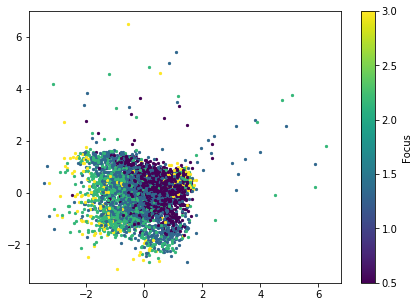

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

im, ax = vis.plot_cryo(ax, OUTPUT, DATASET_PATH, LABELS_PATH)
cb = fig.colorbar(im, ax=ax)
focus = cb.set_label('Focus')
yticklabels = cb.ax.set_yticklabels(np.arange(start=0.5, stop=5.5, step=0.5))

Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_11_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.0019873,lambda_regu=0.96069,latent_dim=3,lr=0.0001286,n_blocks=6_2019-11-05_22-49-088if114w0/checkpoint_100/epoch_100_checkpoint.pth.
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_11_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.0019873,lambda_regu=0.96069,latent_dim=3,lr=0.0001286,n_blocks=6_2019-11-05_22-49-088if114w0/checkpoint_100/epoch_100_checkpoint.pth.
Loading encoder from network of architecture: conv_orig...
(4917, 3)


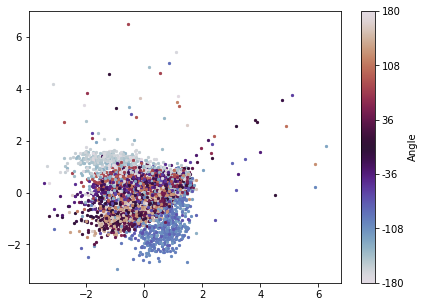

In [10]:
import matplotlib.cm as cm
colormap_tw = cm.get_cmap('twilight')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

im, ax = vis.plot_cryo(ax, OUTPUT, DATASET_PATH, LABELS_PATH, label_name='theta')
cb = fig.colorbar(cm.ScalarMappable(cmap=colormap_tw), ax=ax)
angle = cb.set_label('Angle')

yticklabels = cb.ax.set_yticklabels(np.arange(start=-180, stop=181, step=72))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Found checkpoint. Getting: /gpfs/slac/cryo/fs1/u/nmiolane/results/output_cryo_exp_class_2d/Train_5_dataset_name=cryo_exp_class_2d,lambda_adversarial=1.5834,lambda_regularization=0.060532,latent_dim=4,lr=0.00017883,n_block_2019-11-05_02-10-521jzzvchg/checkpoint_65/epoch_65_checkpoint.pth.
Found checkpoint. Getting: /gpfs/slac/cryo/fs1/u/nmiolane/results/output_cryo_exp_class_2d/Train_5_dataset_name=cryo_exp_class_2d,lambda_adversarial=1.5834,lambda_regularization=0.060532,latent_dim=4,lr=0.00017883,n_block_2019-11-05_02-10-521jzzvchg/checkpoint_65/epoch_65_checkpoint.pth.
Loading encoder from network of architecture: conv_orig...
(4917, 4)


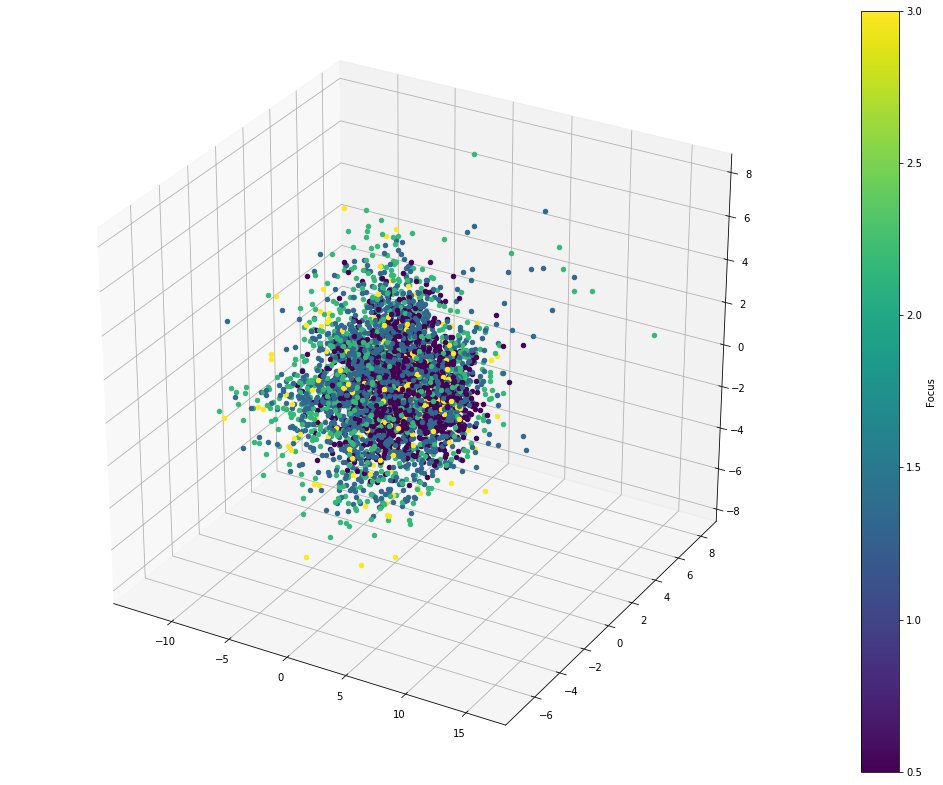

In [53]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure(figsize=(18, 14))
ax = fig.add_subplot(111, projection='3d')

im, ax = vis.plot_cryo(ax, OUTPUT, DATASET_PATH, LABELS_PATH, n_pc=3)
cb = fig.colorbar(im, ax=ax)
focus = cb.set_label('Focus')
yticklabels = cb.ax.set_yticklabels(np.arange(start=0.5, stop=3.5, step=0.5))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Found checkpoint. Getting: /gpfs/slac/cryo/fs1/u/nmiolane/results/output_cryo_exp_class_2d/Train_5_dataset_name=cryo_exp_class_2d,lambda_adversarial=1.5834,lambda_regularization=0.060532,latent_dim=4,lr=0.00017883,n_block_2019-11-05_02-10-521jzzvchg/checkpoint_65/epoch_65_checkpoint.pth.
Found checkpoint. Getting: /gpfs/slac/cryo/fs1/u/nmiolane/results/output_cryo_exp_class_2d/Train_5_dataset_name=cryo_exp_class_2d,lambda_adversarial=1.5834,lambda_regularization=0.060532,latent_dim=4,lr=0.00017883,n_block_2019-11-05_02-10-521jzzvchg/checkpoint_65/epoch_65_checkpoint.pth.
Loading encoder from network of architecture: conv_orig...
(4917, 4)


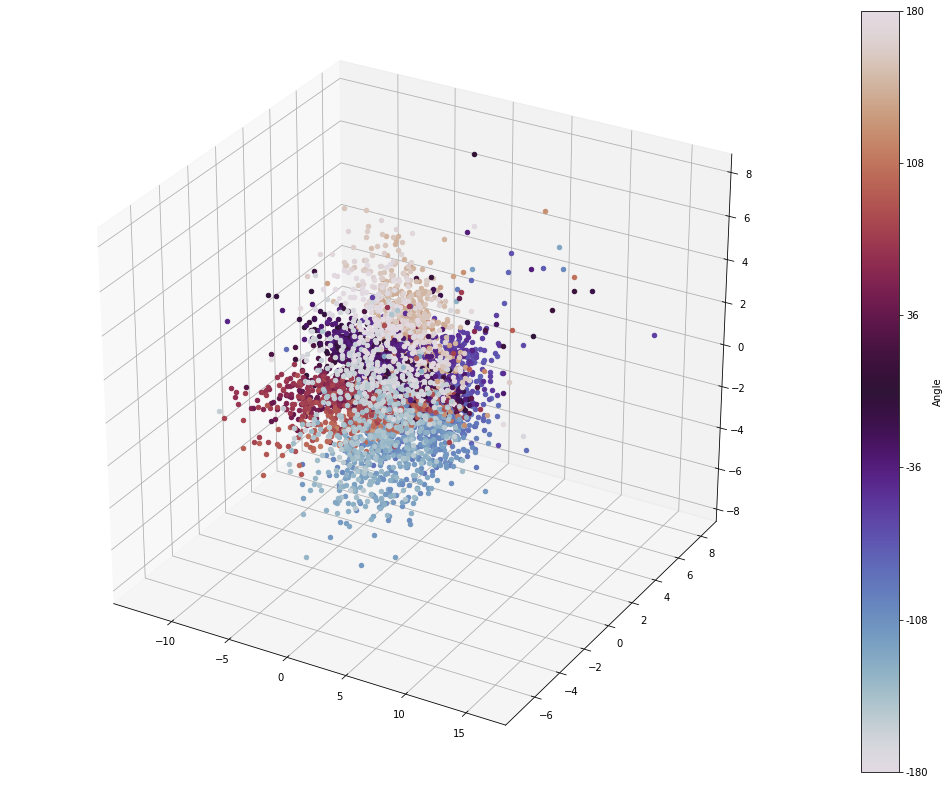

In [54]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure(figsize=(18, 14))
ax = fig.add_subplot(111, projection='3d')

im, ax = vis.plot_cryo(ax, OUTPUT, DATASET_PATH, LABELS_PATH, n_pc=3, label_name='theta')
cb = fig.colorbar(cm.ScalarMappable(cmap=colormap_tw), ax=ax)
angle = cb.set_label('Angle')
yticklabels = cb.ax.set_yticklabels(np.arange(start=-180, stop=181, step=72))

Loading /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/data/cryo/train_val_datasets/cryo_exp_class_2d_30_128x128.npy
Dataset shape: (4917, 1, 128, 128)
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_11_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.0019873,lambda_regu=0.96069,latent_dim=3,lr=0.0001286,n_blocks=6_2019-11-05_22-49-088if114w0/checkpoint_100/epoch_100_checkpoint.pth.
Loading encoder from network of architecture: conv_orig...
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_11_class_2d=30,dataset_name=cryo_exp_class_2d,lambda_adv=0.0019873,lambda_regu=0.96069,latent_dim=3,lr=0.0001286,n_blocks=6_2019-11-05_22-49-088if114w0/checkpoint_100/epoch_100_checkpoint.pth.
Loading decoder from network of architecture: conv_orig...
Found checkpoint. Getting: /afs/slac.stanford.edu/u/bd/nmiolane/gpfs_home/results/output_cryo_exp_class_2d/Train_11_cl

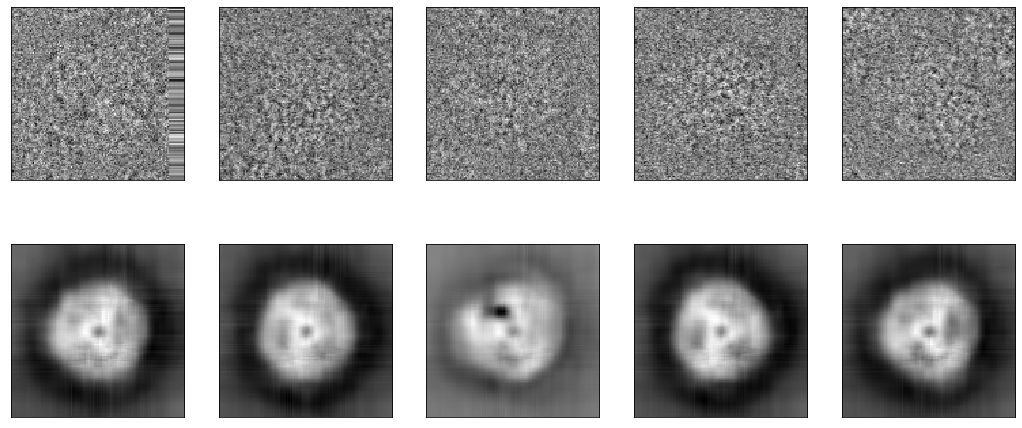

In [11]:
epoch_id = 100
vis.show_img_and_recon(OUTPUT, dataset_path=DATASET_PATH, epoch_id=epoch_id, cmap=CMAP)